# Model a Galaxy Cluster

## Notebook for generating an example galaxy cluster model. 

This notebook goes through the steps to generate model data for galaxy cluster weak lensing observables.  In particular, we define a galaxy cluster model that follows and NFW distribution and generate various profiles for the model (mass density, convergence, shear, etc.), which we plot.  Note, a full pipeline to measure a galaxy cluster weak lensing mass requires fitting the observed (or mock) data to a model. In this notebook we use the OO interface to theory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Imports specific to clmm 

In [2]:
import os

os.environ['CLMM_MODELING_BACKEND'] = 'ccl' # here you may choose ccl, nc (NumCosmo) or ct (cluster_toolkit)

import clmm
from clmm import Cosmology

Make sure we know which version we're using

In [3]:
clmm.__version__

'1.0.6'

Define a cosmology using astropy

In [4]:
cosmo = Cosmology(H0=70.0, Omega_dm0=0.27-0.045, Omega_b0=0.045, Omega_k0=0.0)

Define the galaxy cluster model.  Here, we choose parameters that describe the galaxy cluster model, including the mass definition, concentration, and mass distribution.  For the mass distribution, we choose a distribution that follows an NFW profile.

In [5]:
moo = clmm.Modeling(massdef='mean', delta_mdef=200, halo_profile_model='nfw')

moo.set_cosmo(cosmo)
moo.set_concentration(4)
moo.set_mass(1.e15)

z_cl = 1.
z_source = 2.
b = 3

Quick test of all theory functionality

In [6]:
r3d = np.logspace(-2, 2, 100)
rho = moo.eval_3d_density(r3d, z_cl)
Sigma = moo.eval_surface_density(r3d, z_cl)
DeltaSigma = moo.eval_excess_surface_density(r3d, z_cl)
DeltaSigma2h = moo.eval_excess_surface_density_2h(r3d, z_cl,b)
Sigmac = moo.eval_critical_surface_density(z_cl, z_source)
gammat = moo.eval_tangential_shear(r3d, z_cl, z_source)
kappa = moo.eval_convergence(r3d, z_cl, z_source)
gt = moo.eval_reduced_tangential_shear(r3d, z_cl, z_source)
mu = moo.eval_magnification(r3d, z_cl, z_source)

/pbs/home/c/cmurray/anaconda3/lib/python3.8/site-packages/pyccl/core.py:768: CCLWarning: The 'bbks' linear power spectrum model does not properly account for massive neutrinos!
  warnings.warn(
/pbs/home/c/cmurray/anaconda3/lib/python3.8/site-packages/pyccl/core.py:736: CCLWarning: CCL does not properly compute the linear growth rate in cosmological models with massive neutrinos!
  warnings.warn(


Plot the predicted profiles

In [7]:
def plot_profile(r, profile_vals, profile_label='rho'):
    plt.loglog(r, profile_vals)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

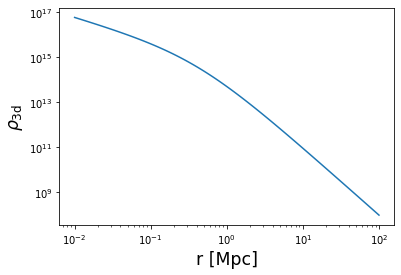

In [8]:
plot_profile(r3d, rho, '$\\rho_{\\rm 3d}$')

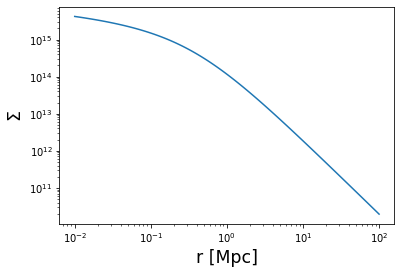

In [9]:
plot_profile(r3d, Sigma, '$\\Sigma$')

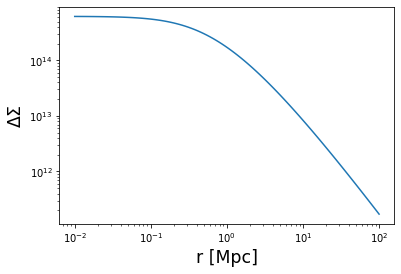

In [10]:
plot_profile(r3d, DeltaSigma, '$\\Delta\\Sigma$')

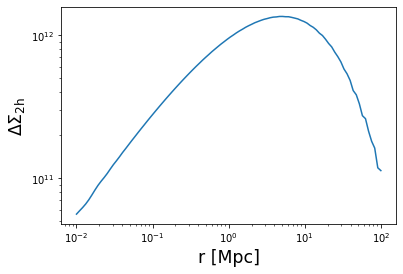

In [11]:
plot_profile(r3d, DeltaSigma2h, '$\\Delta\\Sigma_{\\rm 2h}$')

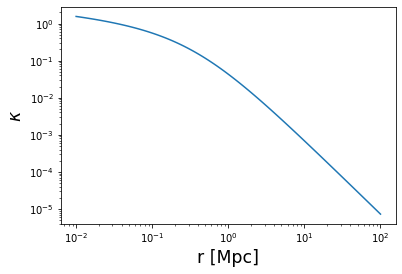

In [12]:
plot_profile(r3d, kappa, '$\\kappa$')

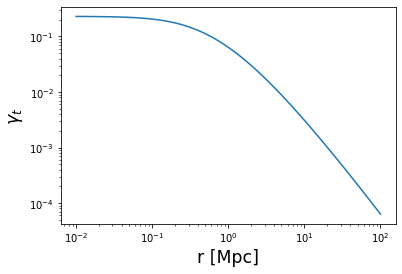

In [13]:
plot_profile(r3d, gammat, '$\\gamma_t$')

In [ ]:
plot_profile(r3d, gt, '$g_t$')

In [ ]:
plot_profile(r3d, mu, '$\mu$')